In [24]:
import numpy as np
import matplotlib.pyplot as plt

# func
def func(x):
    if x < 100 or x > 120:
        return 0.
    else:
        return 10.

# initial condition
u = -0.75; dt = 0.05; dx = 0.5 # control vars
tinterval = 200; duration = 2000+10 # time
c = u*dt/dx # auxiliary vars


x0 = np.arange(0, 450+dx, dx);
y0 = np.vectorize(func)(x0)

print(c)

-0.07500000000000001


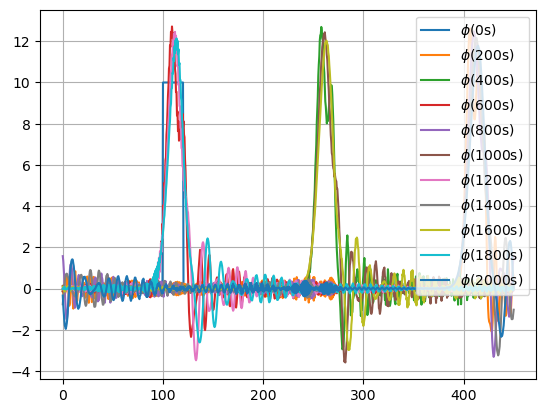

In [25]:
# ctcs

# scheme
def ftfs(y0): # use ftfs and ftbs for 1st value
    return (1+c)*y0 - c*np.roll(y0, -1)
def ftbs(y0): # ftfs, ftbs change based on the sign of velocity u
    return (1-c)*y0 + c*np.roll(y0, +1)
def ctcs(y0, y1): # use ctcs for the 2nd value onward
    return y0 - c*(np.roll(y1, -1) - np.roll(y1, +1))

# filter is used to update new data of y after calling ctcs
def rafilter(y0, y1, y2):
    d = alpha*(y0 - 2*y1 + y2)
    return y1 + d, y2
def rawfilter(y0, y1, y2):
    d = alpha*(y0 - 2*y1 + y2)
    return y1 + beta*d, y2 - (beta - 1)*d

# main loop
def run(x0, y0, filter):
    t = 0
    y1 = ftbs(y0) if u < 0 else ftfs(y0) #ftbs & ftbs
    plt.plot(x0, y0, label="$\phi$(" + str(int(np.floor(t))) + "s)")
    while t < duration:
        t = t + dt
        y2 = ctcs(y0, y1)
        if filter == "raw":
            y0, y1 = rawfilter(y0, y1, y2)
        else: y0, y1 = rafilter(y0, y1, y2)
        # y0 = y1.copy()
        # y1 = y2.copy()
        if t % tinterval < dt:
            plt.plot(x0, y2, label="$\phi$(" + str(int(np.floor(t))) + "s)")
    plt.legend()
    plt.grid()
    plt.show()

alpha = 0.05; beta = 0.53 # filter
run(x0, y0, "ra")


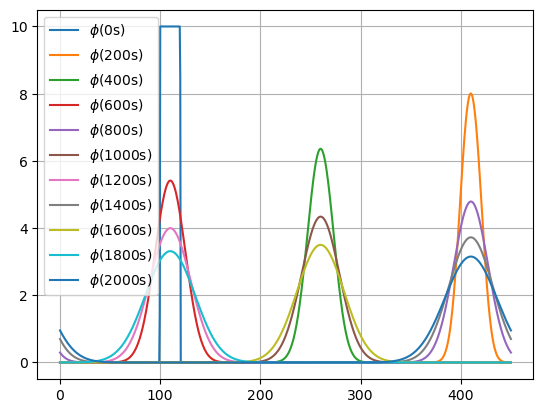

In [29]:
# semi-lagrange
def linearInterp(a, y1, y2):
    return (1-a)*y1 + (a)*y2
def cubicInterp(a, x1, x2, x3, x4):
    return -a*(1-a**2)  *x1/6   \
        + a*(1+a)*(2-a) *x2/2   \
        + (1-a**2)*(2-a)*x3/2   \
        - a*(1-a)*(2-a) *x4/6

# lagrangian
def lagrangian(x0, y0, interpMethod):
    t = 0; sz = len(x0); xmax = max(x0)
    y1 = np.zeros(sz)
    while t < duration:
        for i in range(sz):
            xdepart = x0[i] - u*dt
            # periodic boundary condition
            if xdepart < 0: # velocity > 0
                xdepart = xdepart + xmax
            if xdepart > xmax: # velocity < 0
                xdepart = xdepart - xmax
            m = int(np.floor(xdepart/dx))
            a = (xdepart - x0[m])/dx
            if interpMethod == "linearInterp":
                y1[i] = linearInterp(a, y0[m], y0[m+1]) #linear
            else:
                y1[i] = cubicInterp(a, y0[m-2], y0[m-1], y0[m], y0[m+1])
        y0 = y1.copy()
        if t % tinterval < dt:
            plt.plot(x0, y0, label="$\phi$(" + str(int(np.floor(t))) + "s)")
        t = t + dt
    plt.legend()
    plt.grid()
    plt.show()
dt = 0.1
lagrangian(x0, y0, "linearInterp")
